In [1]:
using ViscousFlow

In [2]:
using Plots

In [3]:
gr(size=(500,500), html_output_format=:png)

Plots.GRBackend()

In [4]:
Re = 200; # Reynolds number
U = 1.0; # Free stream velocity
U∞ = (U,0.0);

In [5]:
xlim = (-1.0,3.0)
ylim = (-1.0,1.0);
Δx, Δt = setstepsizes(Re,gridRe=4.0)

(0.02, 0.01)

In [6]:
body = Plate(1.0,1.0Δx)
T = RigidTransform((0.,0.),0.)
T(body)

Plate with 50 points and length 1.0 and thickness 0.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [7]:
a = 0.25 # location of pitch axis, a = 0.5 is leading edge
ϕp = -π/2  # phase lag of pitch
ϕh = 0.0  # phase lag of heave
A = 0.25  # amplitude/chord
fstar = 1/π # fc/U
α₀ = -5π/12 # mean angle of attack
Δα = 10π/180 # amplitude of pitching
U₀ = 0.0 # translational motion (set to zero in place of free stream)
K = (13π/12)*fstar # reduced frequency, K = πfc/U

oscil1 = RigidBodyTools.PitchHeave(U₀,a,K,ϕp,α₀,Δα,A,ϕh)
motion = RigidBodyMotion(oscil1)

Rigid Body Motion:
  ċ = 0.34 + 0.35im
  c̈ = 0.17 - 0.46im
  α̇ = -1.4
  α̈ = -0.27
  Oscillatory kinematics with
     Steady velocity U = (0.0,0.0)
     Ref angle α₀ = -1.5707963267948966
     Mean rotation rate α̇₀ = 0.0
     Pitch axis (rel. to centroid) a = (0.25,0.0)
     Frequency Ω = 1.0833333333333335
     x amplitude Ax, phase lag ϕx = (0.0, 0.0)
     y amplitude Ay, phase lag ϕy = (0.25, 0.0)
     α amplitude Δα, phase lag ϕα = (-1.3089969389957472, 0.17453292519943295)


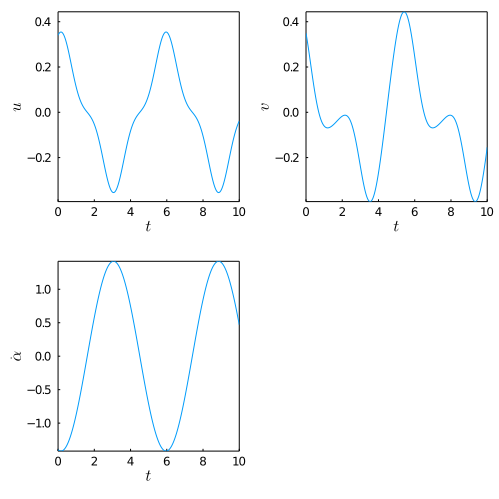

In [8]:
plot(motion)

In [9]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,body,motion,freestream = U∞)

External/internal Navier-Stokes system on a grid of size 208 x 104 and 50 moving immersed points
   Static freestream = (1.0, 0.0)
   1 body


In [10]:
u0 = newstate(sys)
tspan = (0.0,10.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 208, ny = 104) cell grid of type Float64 data
  Number of Dual nodes: (nx = 208, ny = 104), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0])

In [11]:
step!(integrator,6.0)

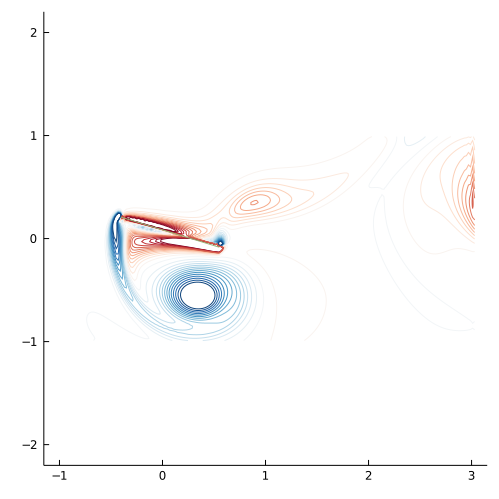

In [12]:
plot(vorticity(integrator),sys,clim=(-10,10),levels=range(-10,10,length=30),color = :RdBu)

┌ Info: Saved animation to 
│   fn = /Users/fardinhaque/Downloads/UCLA Research Folder/Moving Bodies/tmp.gif
└ @ Plots /Users/fardinhaque/.julia/packages/Plots/iYDwd/src/animation.jl:104


Plots.AnimatedGif("/Users/fardinhaque/Downloads/UCLA Research Folder/Moving Bodies/tmp.gif")
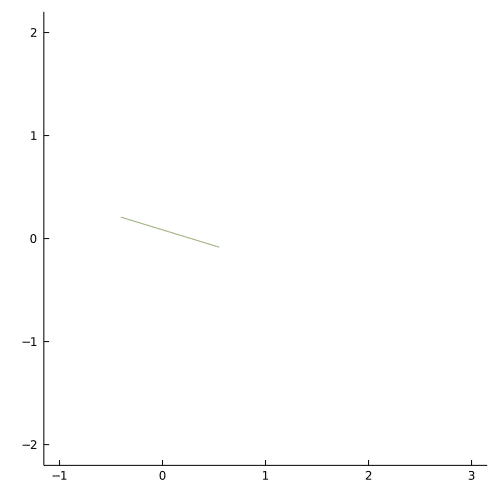

In [13]:
sol = integrator.sol;
@gif for t in sol.t
    plot(vorticity(sol,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu)
end every 5

In [14]:
sol = integrator.sol
fx, fy = force(sol,sys,1);

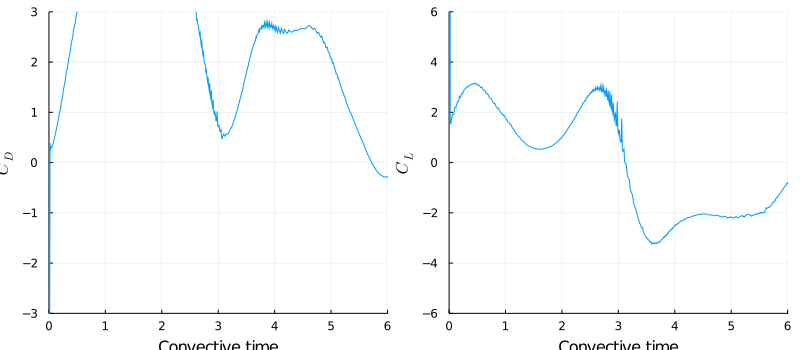

In [15]:
plot(
plot(sol.t,2*fx,xlim=(0,Inf),ylim=(-3,3),xlabel="Convective time",ylabel="\$C_D\$",legend=:false),
plot(sol.t,2*fy,xlim=(0,Inf),ylim=(-6,6),xlabel="Convective time",ylabel="\$C_L\$",legend=:false),
    size=(800,350)
)